In [50]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pylab as plt

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# Load data 
import dataset '03_firstExam_data_english_v1.1.csv'

In [51]:
data=pd.read_csv('03_firstExam_data_english_v1.1.csv')#pd.read_csv('04_secondExam_data_english_v1.1.csv')

In [52]:
data.head()

,desk_no,name,schoolName_Arabic,schoolName_English,administration_Arabic,administration_English,government_Arabic,government_English,branch,Percentage,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
0,102300.0,احمد محمد احمد محمود ابوالقاسم,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,20,unscheduled
1,102301.0,احمد محمد عبدالصادق سلامه,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,23,23,unscheduled
2,102302.0,ادهم اشرف عبدالهادي معاذ,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,17,14,unscheduled
3,102303.0,بيير جون نبيل غالي سعد,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,21,22,unscheduled
4,102304.0,رامي محمود عبدالمنعم شحاته,مدارس النيل المصريه بنين,sch731,أكتوبر,admin65,الجيزة,Giza,undefined,0%,...,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,unscheduled,0.0,19,21,unscheduled


In [53]:
data.columns

Index(['desk_no', 'name', 'schoolName_Arabic', 'schoolName_English',
       'administration_Arabic', 'administration_English', 'government_Arabic',
       'government_English', 'branch', 'Percentage', 'student_type', 'status',
       'arabic', 'first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics', 'total',
       'religion', 'altarbiat_alwatania', 'economics_statistics'],
      dtype='object')

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698197 entries, 0 to 698196
Data columns (total 29 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   desk_no                 698196 non-null  float64
 1   name                    698195 non-null  object 
 2   schoolName_Arabic       698196 non-null  object 
 3   schoolName_English      698196 non-null  object 
 4   administration_Arabic   698196 non-null  object 
 5   administration_English  698196 non-null  object 
 6   government_Arabic       698196 non-null  object 
 7   government_English      698196 non-null  object 
 8   branch                  698196 non-null  object 
 9   Percentage              698196 non-null  object 
 10  student_type            698196 non-null  object 
 11  status                  698196 non-null  object 
 12  arabic                  698196 non-null  object 
 13  first_foreign_lang      698196 non-null  object 
 14  second_foreign_lang 

# Data cleaning 
drop arabic columns, transform columns from string to float

In [72]:
data1 = data.drop(columns=['schoolName_Arabic','administration_Arabic','government_Arabic'])
data1= data1.replace(['unscheduled','absent','canceled','reschedualed'],np.nan) 

float_transfor=['arabic', 'first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics', 'total',
       'religion', 'altarbiat_alwatania', 'economics_statistics']

for l in float_transfor:
    data1[l] = pd.to_numeric(data1[l], errors='coerce')

data1['Percentage'] = data1['Percentage'].replace(r'%',value = " ",regex=True).astype('float')

Start analysis on data, using group function on some columns.


1. Branch 

In [68]:
data1.groupby('branch').count()

,desk_no,name,schoolName_English,administration_English,government_English,Percentage,student_type,status,arabic,first_foreign_lang,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
branch,,,,,,,,,,,,,,,,,,,,,
literary,259147,259147,259147,259147,259147,259147,259147,259147,258354,258224,...,258297,0,0,0,0,0,259147,229386,229515,229233
mathematics,97616,97616,97616,97616,97616,97616,97616,97616,97090,96951,...,0,96841,0,0,96819,96780,97616,87598,87600,87521
science,325644,325643,325644,325644,325644,325644,325644,325644,323112,322122,...,0,321569,322477,322814,0,321166,325644,293564,293625,293406
undefined,15789,15789,15789,15789,15789,15789,15789,15789,15497,0,...,0,0,0,0,0,0,15789,15620,15624,0


Drop undefined branch from data because counts function on marks is 0.

In [120]:
#data1_set_index = data1.set_index("branch")
#data2 = data1_set_index.drop("undefined")
#data3= data1.drop("undefined")
data1 = data1.loc[data1["branch"] != "undefined"]
data1.groupby('branch').count()

,desk_no,name,schoolName_English,administration_English,government_English,Percentage,student_type,status,arabic,first_foreign_lang,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
branch,,,,,,,,,,,,,,,,,,,,,
literary,259147,259147,259147,259147,259147,259147,259147,259147,258354,258224,...,258297,0,0,0,0,0,259147,229386,229515,229233
mathematics,97616,97616,97616,97616,97616,97616,97616,97616,97090,96951,...,0,96841,0,0,96819,96780,97616,87598,87600,87521
science,325644,325643,325644,325644,325644,325644,325644,325644,323112,322122,...,0,321569,322477,322814,0,321166,325644,293564,293625,293406


Create 4 list: marks, marks_lit, marks_math, marks_sci], each one contains the mane of the subject with no-nan values

In [107]:
marks=['arabic','first_foreign_lang', 'second_foreign_lang',
       'pure_mathematics', 'history', 'geography', 'philosophy', 'psychology',
       'chemistry', 'biology', 'geology', 'applied_math', 'physics', 'total']

marks_lit=['first_foreign_lang', 'second_foreign_lang',
           'history', 'geography', 'philosophy', 'psychology','total']

marks_math = ['arabic','first_foreign_lang', 'second_foreign_lang', 'pure_mathematics',
              'chemistry',  'applied_math', 'physics', 'total']

marks_sci=['arabic','first_foreign_lang', 'second_foreign_lang',
           'chemistry', 'biology', 'geology',  'physics', 'total']

Divide the database in 3 sub-database: drop columns with zero marks

In [103]:
data_lit = data1.loc[data1["branch"]=="literary"]
data_lit = data_lit.drop(columns = ['pure_mathematics','chemistry', 'biology', 'geology', 'applied_math', 'physics', 'religion',
                                         'altarbiat_alwatania','economics_statistics'])

data_math = data1.loc[data1["branch"]=="mathematics"]
data_math = data_math.drop(columns = ['history', 'geography', 'philosophy','psychology','biology','geology','religion',
                           'altarbiat_alwatania','economics_statistics'])#, ,])

data_sci = data1.loc[data1["branch"]=="science"]
data_sci = data_sci.drop(columns = [  'pure_mathematics', 'history', 'geography', 'philosophy','psychology','applied_math',
                                    'religion', 'altarbiat_alwatania','economics_statistics'])


Analyse some box plot

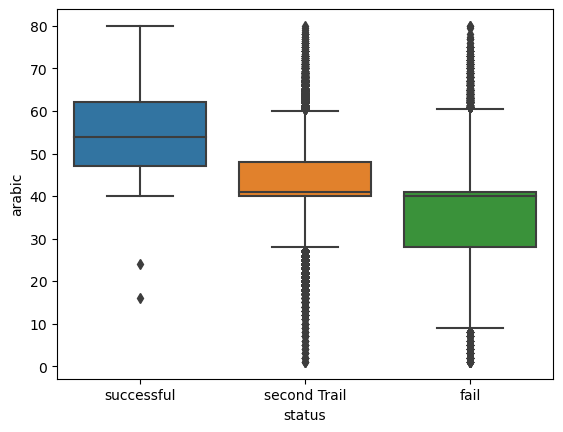

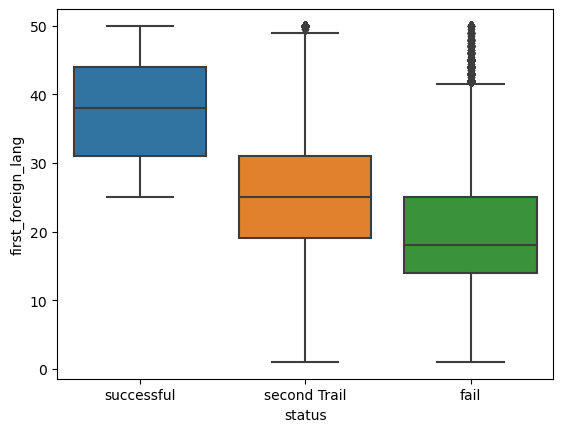

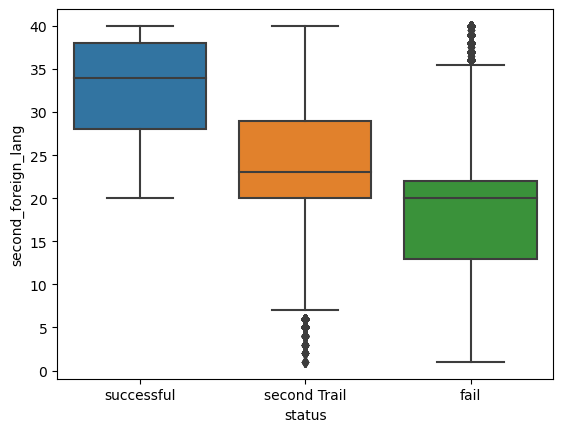

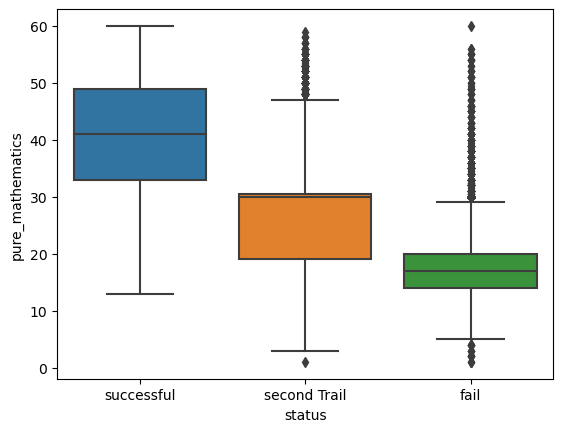

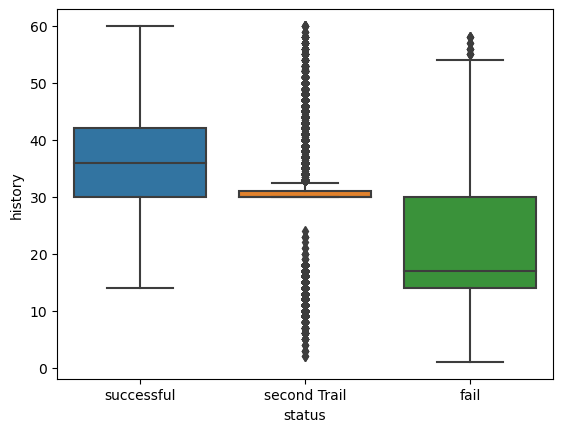

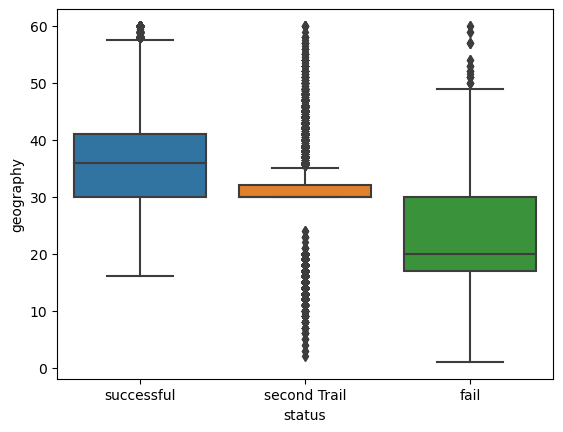

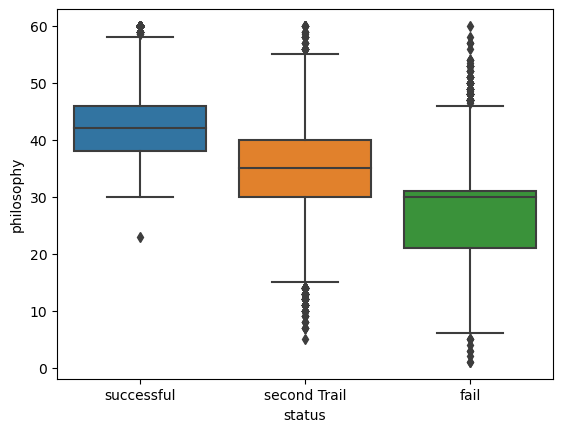

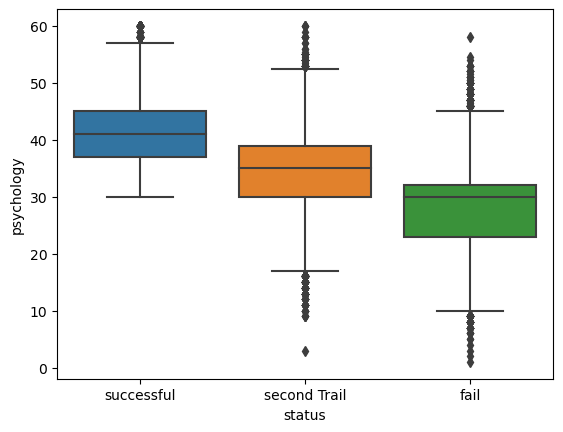

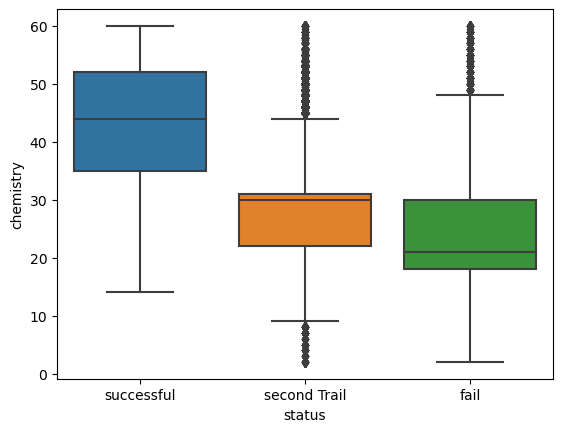

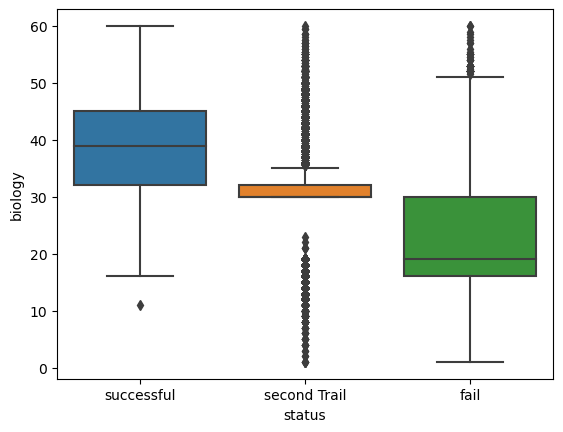

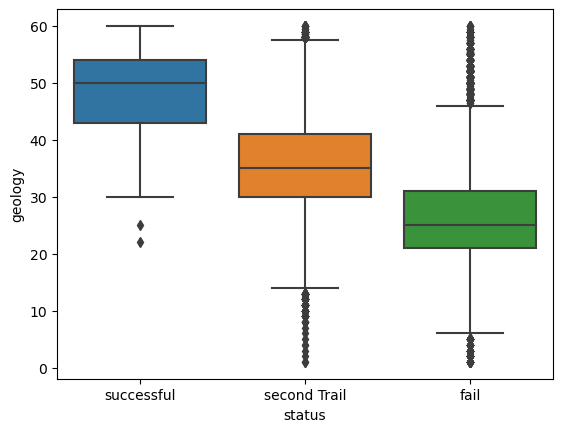

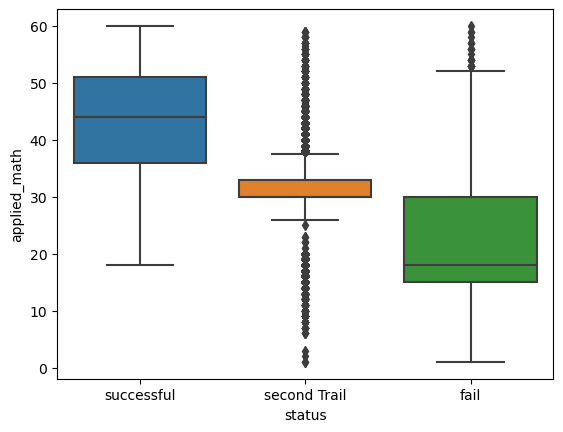

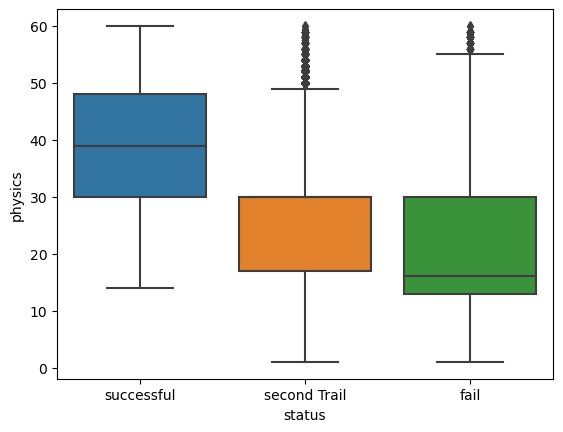

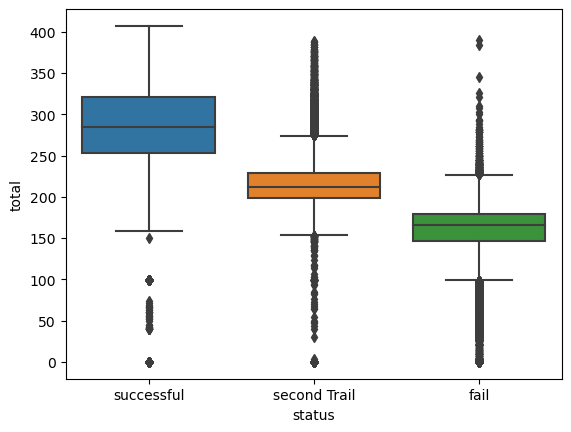

In [109]:
for m in marks: 
    fig, ax = plt.subplots()
    ax=sns.boxplot(x=data1['status'],y=data1[m])

Same box plot as above but only for literature branch

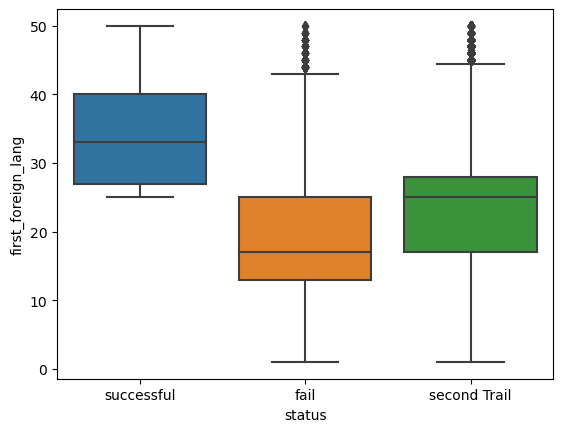

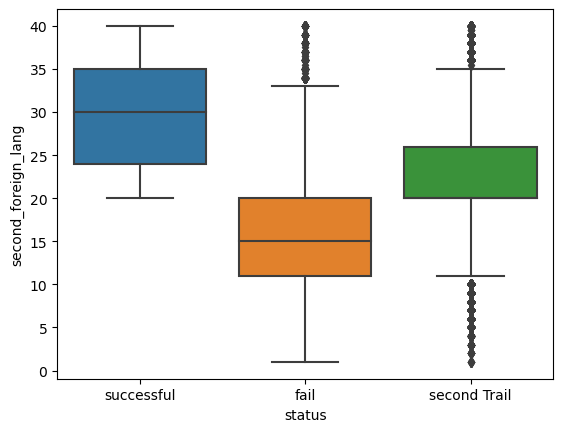

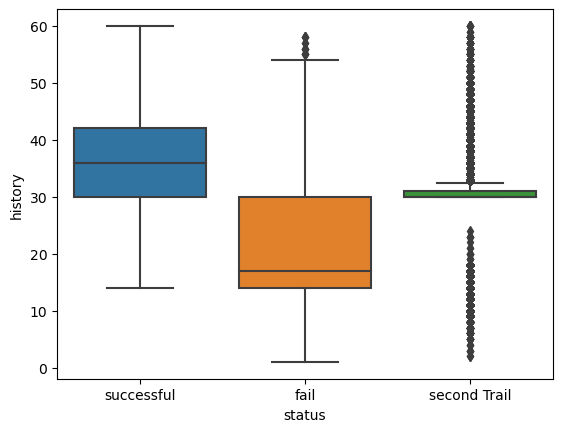

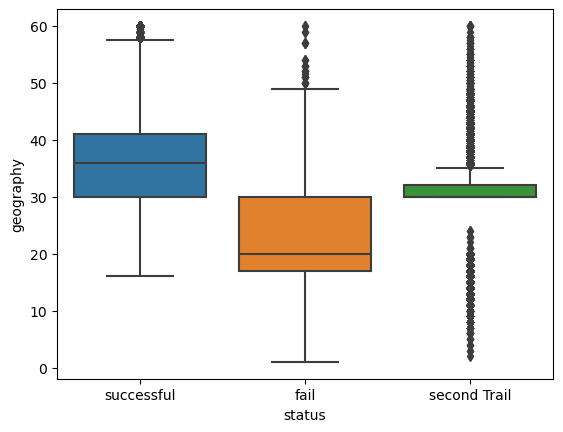

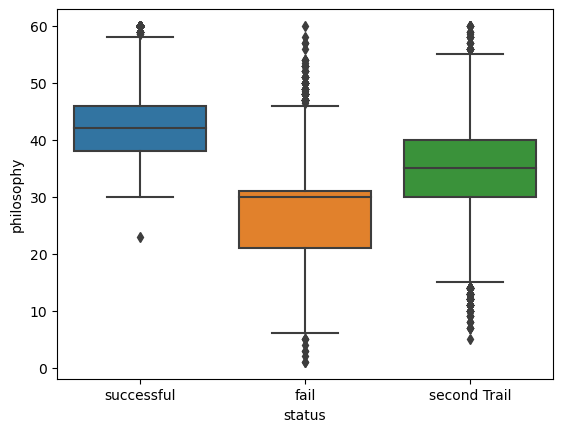

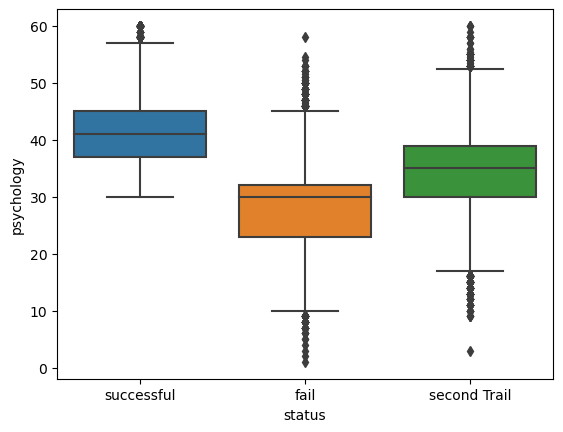

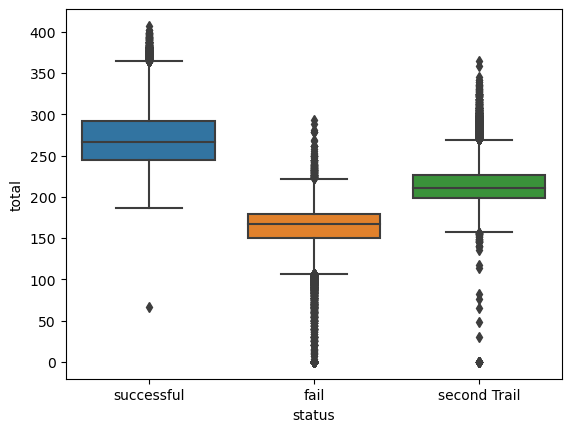

In [110]:
for m in marks_lit: 
    fig, ax = plt.subplots()
    ax=sns.boxplot(x=data_lit['status'],y=data_lit[m])

Same box plot as above but only for mathematics branch

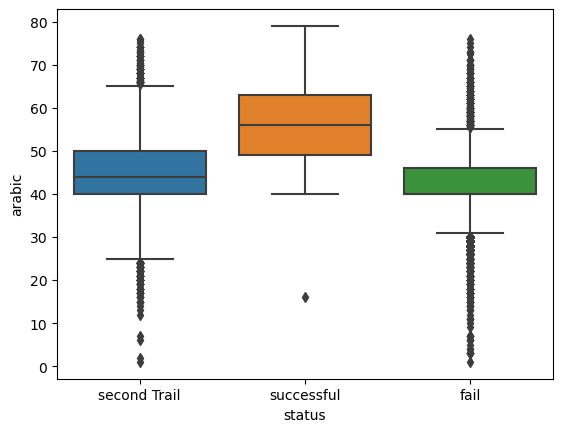

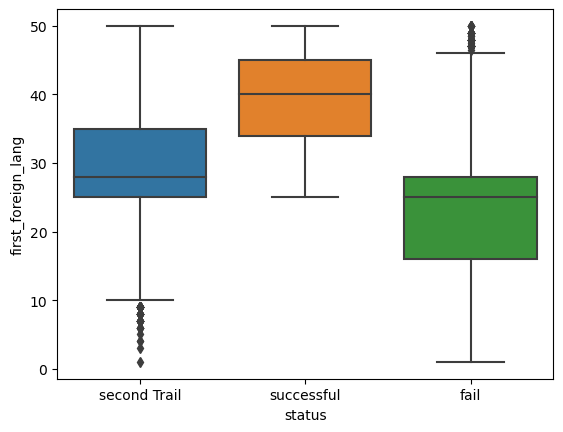

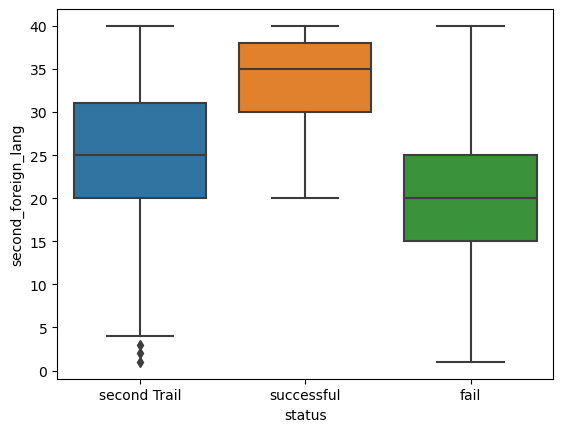

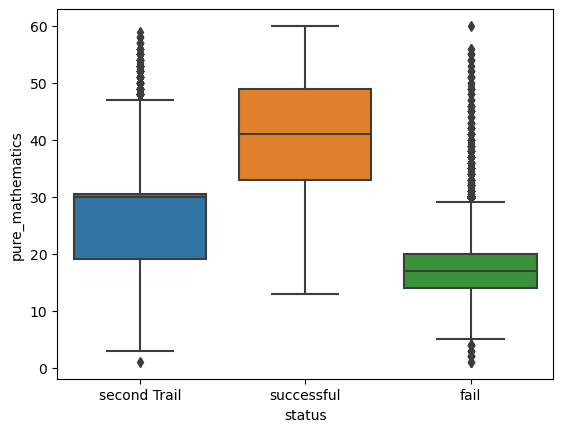

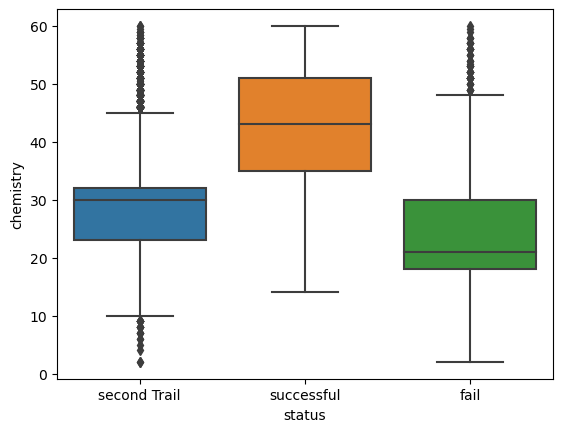

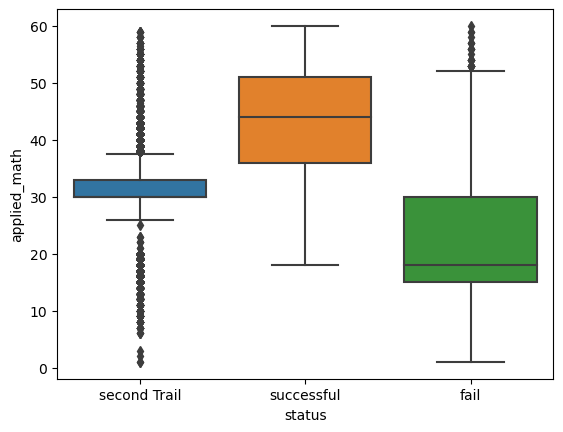

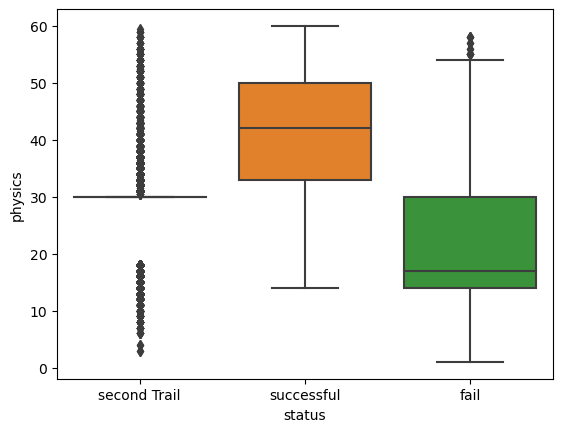

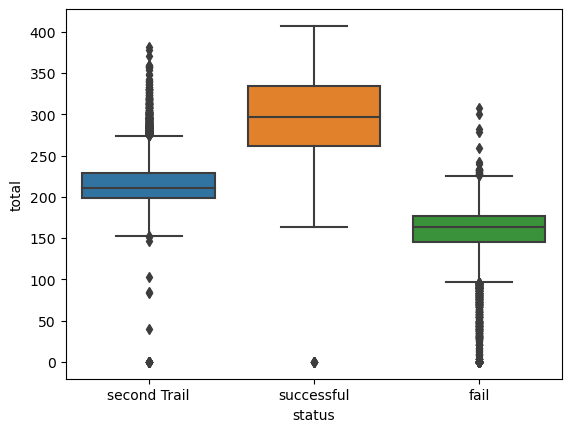

In [111]:
for m in marks_math: 
    fig, ax = plt.subplots()
    ax=sns.boxplot(x=data_math['status'],y=data_math[m])

Same box plot as above but only for science branch

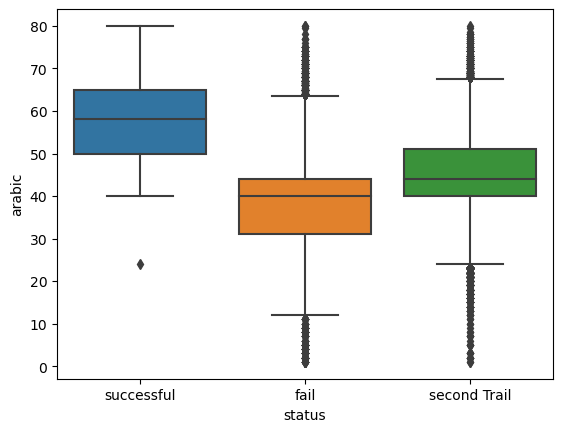

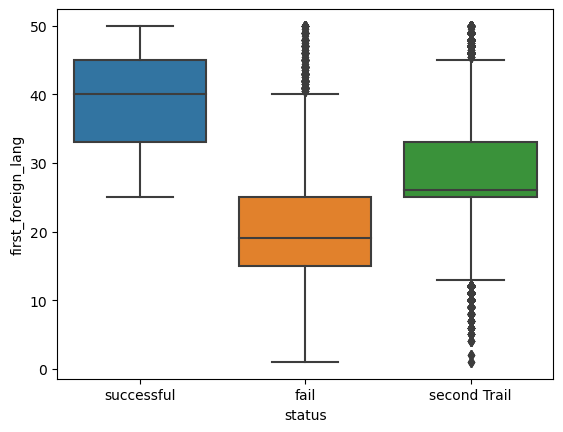

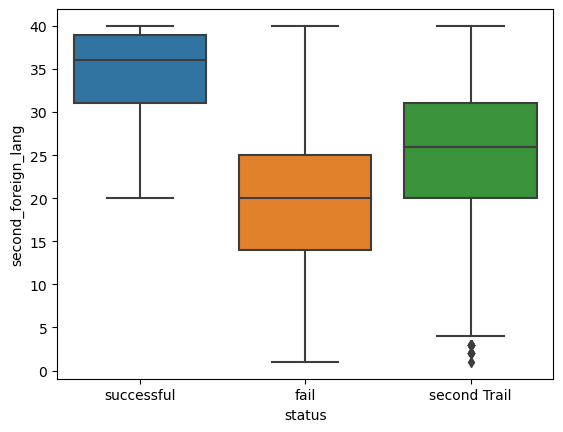

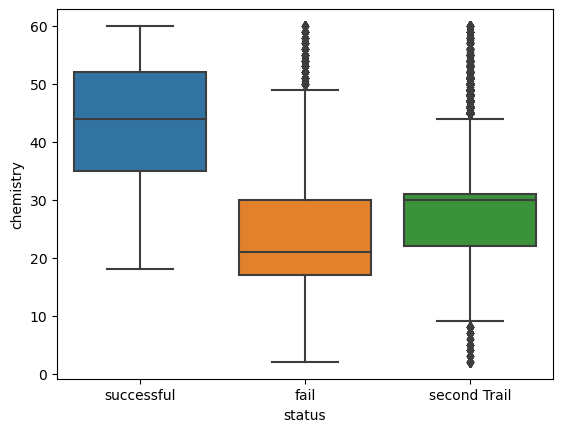

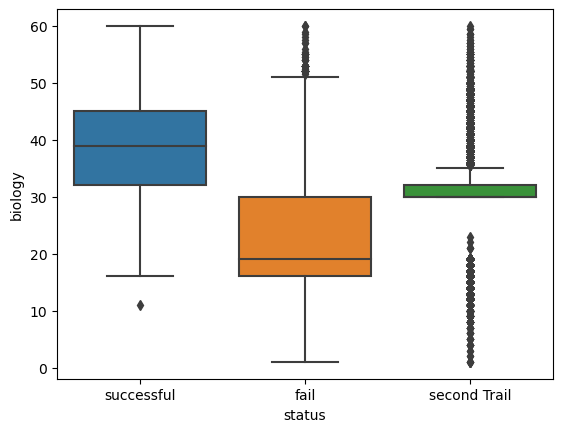

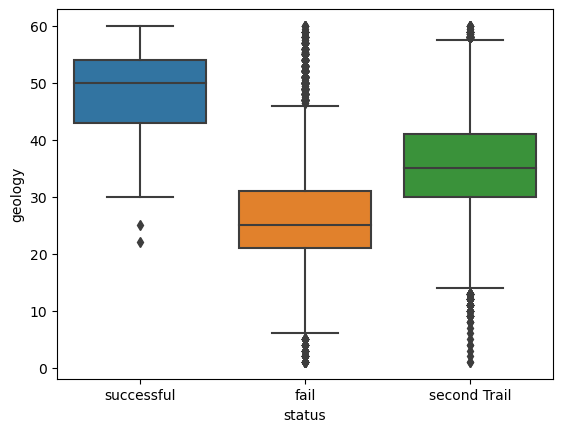

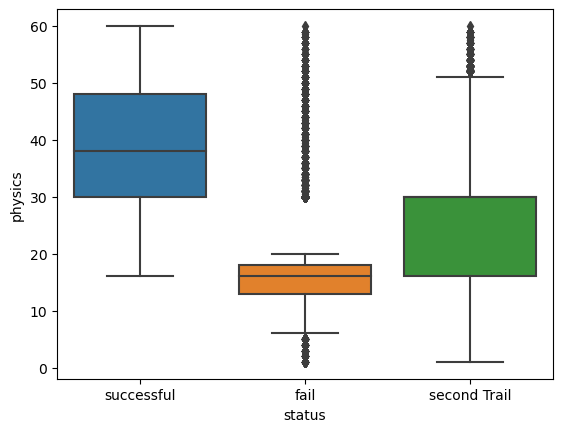

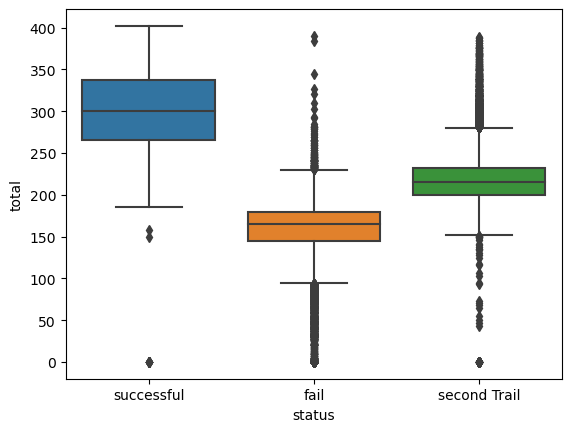

In [112]:
for m in marks_sci: 
    fig, ax = plt.subplots()
    ax=sns.boxplot(x=data_sci['status'],y=data_sci[m])

Box plots show that there are some ouliers: some successful status with total mark equal to zero.
We can investigate about these outliers using sort function:

In [128]:
data_lit.loc[data_lit["status"]=="successful"].sort_values(by = 'total', ascending = True)[:3]

,desk_no,name,schoolName_English,administration_English,government_English,branch,Percentage,student_type,status,arabic,first_foreign_lang,second_foreign_lang,history,geography,philosophy,psychology,total
169801,300524.0,محمد احمد ابراهيم محمد,sch1790,admin77,Giza,literary,16.34,students,successful,NaN,NaN,36.0,31.0,NaN,NaN,NaN,67.0
169868,300591.0,نيللى احمد سعيد ابراهيم,sch1784,admin77,Giza,literary,45.37,students,successful,45.0,27.0,28.0,14.0,16.0,23.0,33.0,186.0
87931,197956.0,يحيي سيد رمضان منجود,sch1749,admin140,Faiyum,literary,51.34,students,successful,41.5,25.0,20.0,31.0,30.0,30.0,33.0,210.5


In the above example we can se there are some missing values in the student with desk number: 300524.0

2. Investigation on status

In [124]:
data1.groupby('status',dropna=True).count()

,desk_no,name,schoolName_English,administration_English,government_English,branch,Percentage,student_type,arabic,first_foreign_lang,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
status,,,,,,,,,,,,,,,,,,,,,
fail,76486,76486,76486,76486,76486,76486,76486,76486,72976,71738,...,31758,39543,32442,32765,7824,39150,76486,58515,58593,58344
second Trail,154958,154957,154958,154958,154958,154958,154958,154958,154637,154597,...,73131,81313,64218,64234,17258,81243,154958,120609,120699,120441
successful,450963,450963,450963,450963,450963,450963,450963,450963,450943,450962,...,153408,297554,225817,225815,71737,297553,450963,431424,431448,431375


In [131]:
data_fail =  data1.loc[data1["status"] != "fail"]
data_secondTrail =  data1.loc[data1["status"] != "second Trail"]
data_successful = data1.loc[data1["status"] != "successful"]

In [129]:
status_mean=pd.DataFrame()
for m in marks: 
    status_mean[m+' mean'] = data1.groupby(['status'])[m].mean()#.reset_index(name = 'Value').round(2)
status_mean

,arabic mean,first_foreign_lang mean,second_foreign_lang mean,pure_mathematics mean,history mean,geography mean,philosophy mean,psychology mean,chemistry mean,biology mean,geology mean,applied_math mean,physics mean,total mean
status,,,,,,,,,,,,,,
fail,36.343072,20.104066,18.642880,19.332172,20.598390,22.556106,26.953513,28.278056,22.227360,23.646985,26.927941,21.150051,18.855364,158.993979
second Trail,43.038364,26.118278,23.945605,27.541266,28.630343,29.804934,35.134231,35.092136,28.986152,30.196331,35.640697,30.353256,25.995329,216.089240
successful,54.691365,37.276302,32.490107,41.466440,37.262775,36.914287,41.830012,40.926806,43.526636,39.387934,48.091976,43.633892,40.405528,290.456741


In [42]:
data_fail.groupby('government_English',dropna=True).count()

,desk_no,name,schoolName_English,administration_English,branch,Percentage,student_type,status,arabic,first_foreign_lang,...,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
government_English,,,,,,,,,,,,,,,,,,,,,
Alexandria,43201,43201,43201,43201,43201,43201,43201,43201,43185,43174,...,18902,24270,15547,15544,8730,24265,43201,39750,39759,39726
Aswan,5638,5638,5638,5638,5638,5638,5638,5638,5637,5633,...,1666,3965,3503,3500,467,3967,5638,4938,4938,4940
Asyut,20645,20645,20645,20645,20645,20645,20645,20645,20621,20618,...,7192,13420,11917,11923,1515,13411,20645,17117,17123,17107
Beheira,30155,30155,30155,30155,30155,30155,30155,30155,30131,30129,...,8239,21874,19736,19739,2155,21871,30155,28060,28071,28061
Beni Suef,15552,15552,15552,15552,15552,15552,15552,15552,15535,15534,...,4903,10632,8404,8398,2237,10625,15552,13876,13879,13874
Dakahlia,46924,46924,46924,46924,46924,46924,46924,46924,46913,46913,...,13774,33135,25801,25799,7335,33126,46924,46100,46105,46099
Damietta,11403,11403,11403,11403,11403,11403,11403,11403,11399,11396,...,4052,7345,5144,5143,2202,7342,11403,11078,11077,11077
Elwadi Elgadid,1684,1684,1684,1684,1684,1684,1684,1684,1684,1684,...,664,1018,926,927,92,1018,1684,1596,1596,1596
Faiyum,13284,13284,13284,13284,13284,13284,13284,13284,13278,13269,...,4072,9190,7887,7885,1319,9192,13284,11055,11059,11046


3. Distribution plots: 

In [ ]:
for m in marks: 
    fig, ax = plt.subplots()
    ax=sns.distplot(data1[m], kde = True)

<AxesSubplot:xlabel='total', ylabel='Density'>

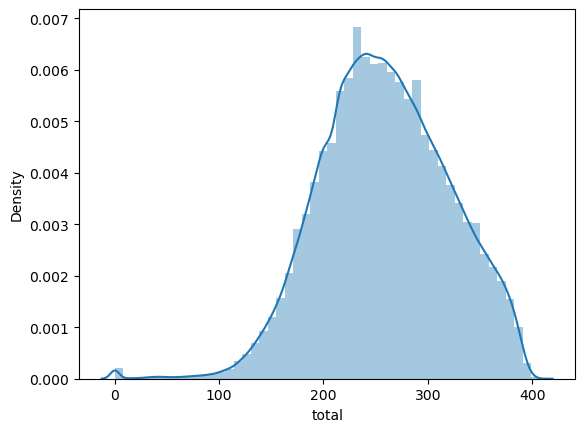

In [133]:
#distribution plot only of total score
sns.distplot(data1['total'], kde = True)


<AxesSubplot:xlabel='total', ylabel='Density'>

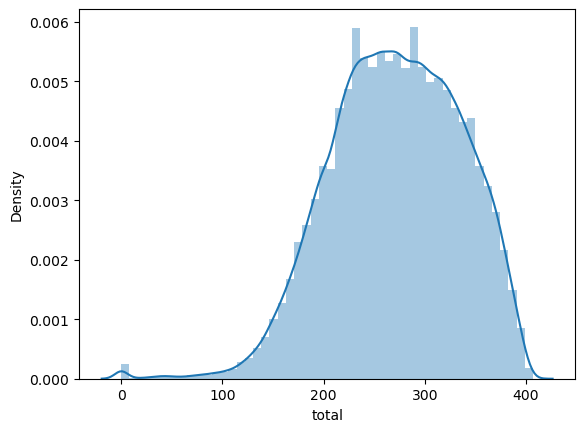

In [135]:
sns.distplot(data_math['total'], kde = True)

Distribution plot: blue successful, red second trail, green fail

<AxesSubplot:xlabel='total', ylabel='Density'>

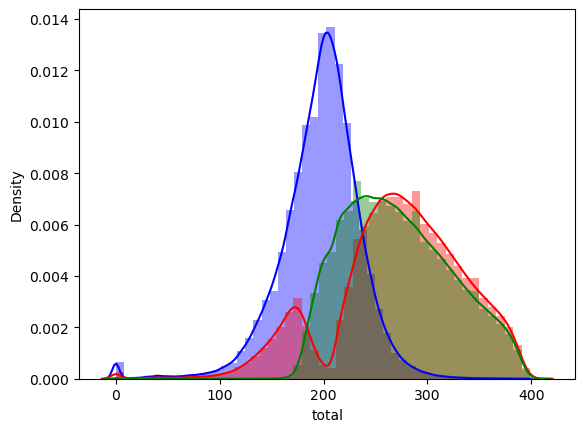

In [140]:
sns.distplot(data_successful['total'], kde = True,color='Blue') 
sns.distplot(data_secondTrail['total'], kde = True,color='Red') 
sns.distplot(data_fail['total'], kde = True,color='Green') 





3. Marks statistics and correlation values: divided on literature, mathematics and science branches

In [151]:
marks_data_lit = data_lit.loc[:,marks_lit]
marks_data_lit.describe()

,first_foreign_lang,second_foreign_lang,history,geography,philosophy,psychology,total
count,258224.000000,257304.000000,258155.000000,258427.000000,258334.000000,258297.000000,259147.000000
mean,29.134581,25.613599,32.774366,33.131060,38.104295,37.719668,240.695482
std,9.721315,8.013986,9.712496,8.380363,8.076330,7.164803,48.719388
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,25.000000,20.000000,30.000000,30.000000,32.000000,33.000000,208.000000
50%,28.000000,25.000000,30.000000,31.000000,39.000000,38.000000,241.000000
75%,36.000000,32.000000,39.000000,38.000000,44.000000,43.000000,274.000000
max,50.000000,40.000000,60.000000,60.000000,60.000000,60.000000,407.000000


In [146]:
marks_data_math = data_math.loc[:,marks_math]
marks_data_math.describe()

,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,chemistry,applied_math,physics,total
count,97090.000000,96951.000000,96879.000000,96743.000000,96841.000000,96819.000000,96780.000000,97616.000000
mean,52.895803,36.064301,30.811801,37.209286,39.098213,39.449684,37.889099,271.339596
std,10.507543,9.232726,7.469258,11.568998,11.229418,11.378084,11.517955,63.725317
min,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000
25%,45.000000,29.000000,25.000000,30.000000,30.000000,30.000000,30.000000,227.000000
50%,53.000000,37.000000,33.000000,37.000000,39.000000,40.000000,37.000000,273.000000
75%,61.000000,44.000000,37.000000,46.000000,48.000000,49.000000,47.000000,320.000000
max,79.000000,50.000000,40.000000,60.000000,60.000000,60.000000,60.000000,407.000000


In [147]:
marks_data_sci = data_sci.loc[:,marks_sci]
marks_data_sci.describe()

,arabic,first_foreign_lang,second_foreign_lang,chemistry,biology,geology,physics,total
count,323112.000000,322122.000000,322525.000000,321569.000000,322477.000000,322814.000000,321166.000000,325644.00000
mean,53.176875,34.988329,31.263225,38.564358,35.973941,43.466293,34.891629,269.52198
std,11.460009,9.950855,7.805920,11.989079,9.258400,10.714634,12.246630,65.43398
min,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.00000
25%,44.000000,27.000000,26.000000,30.000000,30.000000,36.000000,30.000000,223.00000
50%,53.000000,36.000000,34.000000,38.000000,35.000000,46.000000,32.000000,272.00000
75%,62.000000,43.000000,38.000000,49.000000,43.000000,52.000000,44.000000,320.00000
max,80.000000,50.000000,40.000000,60.000000,60.000000,60.000000,60.000000,402.00000


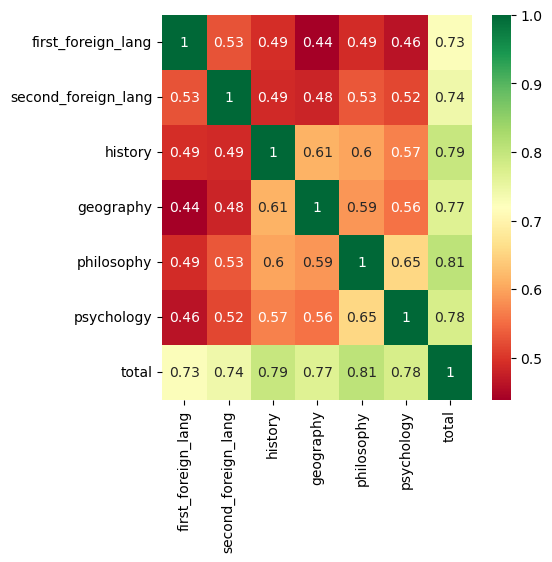

In [154]:
plt.figure(figsize=(5,5))
sns.heatmap(marks_data_lit.corr(),annot=True,cmap='RdYlGn')
plt.show()

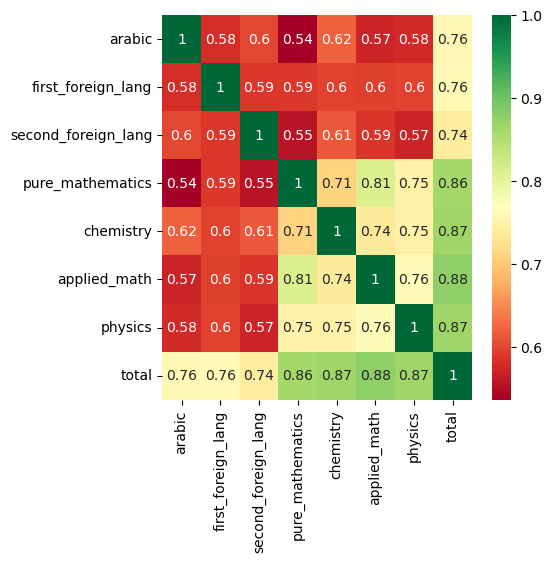

In [155]:
plt.figure(figsize=(5,5))
sns.heatmap(marks_data_math.corr(),annot=True,cmap='RdYlGn')
plt.show()

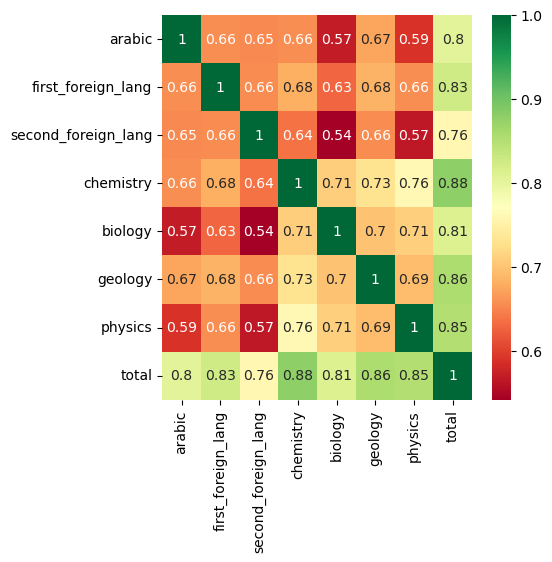

In [156]:
plt.figure(figsize=(5,5))
sns.heatmap(marks_data_sci.corr(),annot=True,cmap='RdYlGn')
plt.show()

4. Some analyses divided on location

Top five locatons by total scores and by first_foreign_lang

In [165]:
top5=data1.groupby('government_English').mean().sort_values(by = 'total', ascending = False)[:5]
top5

,desk_no,Percentage,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
government_English,,,,,,,,,,,,,,,,,,,
North Sinai,777041.751420,74.644571,53.841498,42.361208,32.753802,47.091463,38.071579,34.223158,40.307368,38.637895,45.676832,42.669355,49.388417,47.243902,44.638124,306.042744,18.941196,17.276641,29.680136
Dakahlia,700072.227180,72.844990,55.011867,39.451662,33.496067,44.684756,37.122526,35.249008,41.759480,40.527754,45.194427,41.718445,49.177382,46.433450,42.346943,298.664535,20.120610,19.464177,32.291676
Port Said,771297.539130,71.974757,55.040959,39.506371,32.623669,43.948598,38.297105,37.334975,43.593716,42.664208,42.968750,39.343267,48.107675,46.471963,40.887674,295.096182,20.103697,20.252461,32.721772
Damietta,634491.590636,70.911913,54.281398,38.113259,32.762445,42.731303,36.973307,37.332808,42.672811,41.557982,42.682164,39.987919,47.690875,44.661817,40.345984,290.738875,20.194210,19.812600,32.543492
Gharbia,554090.170340,69.212694,54.118936,36.314633,32.563990,42.212418,34.536350,34.848154,40.632136,40.203453,43.474982,38.250475,46.313642,44.888526,39.398329,283.772080,19.881600,19.521900,31.764541


In [162]:
data1.groupby('government_English').mean().sort_values(by = 'first_foreign_lang', ascending = False)[:5]


,desk_no,Percentage,arabic,first_foreign_lang,second_foreign_lang,pure_mathematics,history,geography,philosophy,psychology,chemistry,biology,geology,applied_math,physics,total,religion,altarbiat_alwatania,economics_statistics
government_English,,,,,,,,,,,,,,,,,,,
North Sinai,777041.751420,74.644571,53.841498,42.361208,32.753802,47.091463,38.071579,34.223158,40.307368,38.637895,45.676832,42.669355,49.388417,47.243902,44.638124,306.042744,18.941196,17.276641,29.680136
Port Said,771297.539130,71.974757,55.040959,39.506371,32.623669,43.948598,38.297105,37.334975,43.593716,42.664208,42.968750,39.343267,48.107675,46.471963,40.887674,295.096182,20.103697,20.252461,32.721772
Dakahlia,700072.227180,72.844990,55.011867,39.451662,33.496067,44.684756,37.122526,35.249008,41.759480,40.527754,45.194427,41.718445,49.177382,46.433450,42.346943,298.664535,20.120610,19.464177,32.291676
South Sinai,771235.384795,68.786480,53.262941,38.769683,32.061176,39.102804,35.768489,34.495177,40.205788,38.884244,41.386194,40.229792,46.306265,42.990654,38.841418,282.024561,19.246691,19.186522,31.389157
Damietta,634491.590636,70.911913,54.281398,38.113259,32.762445,42.731303,36.973307,37.332808,42.672811,41.557982,42.682164,39.987919,47.690875,44.661817,40.345984,290.738875,20.194210,19.812600,32.543492


Box plot division by location

<AxesSubplot:xlabel='government_English', ylabel='total'>

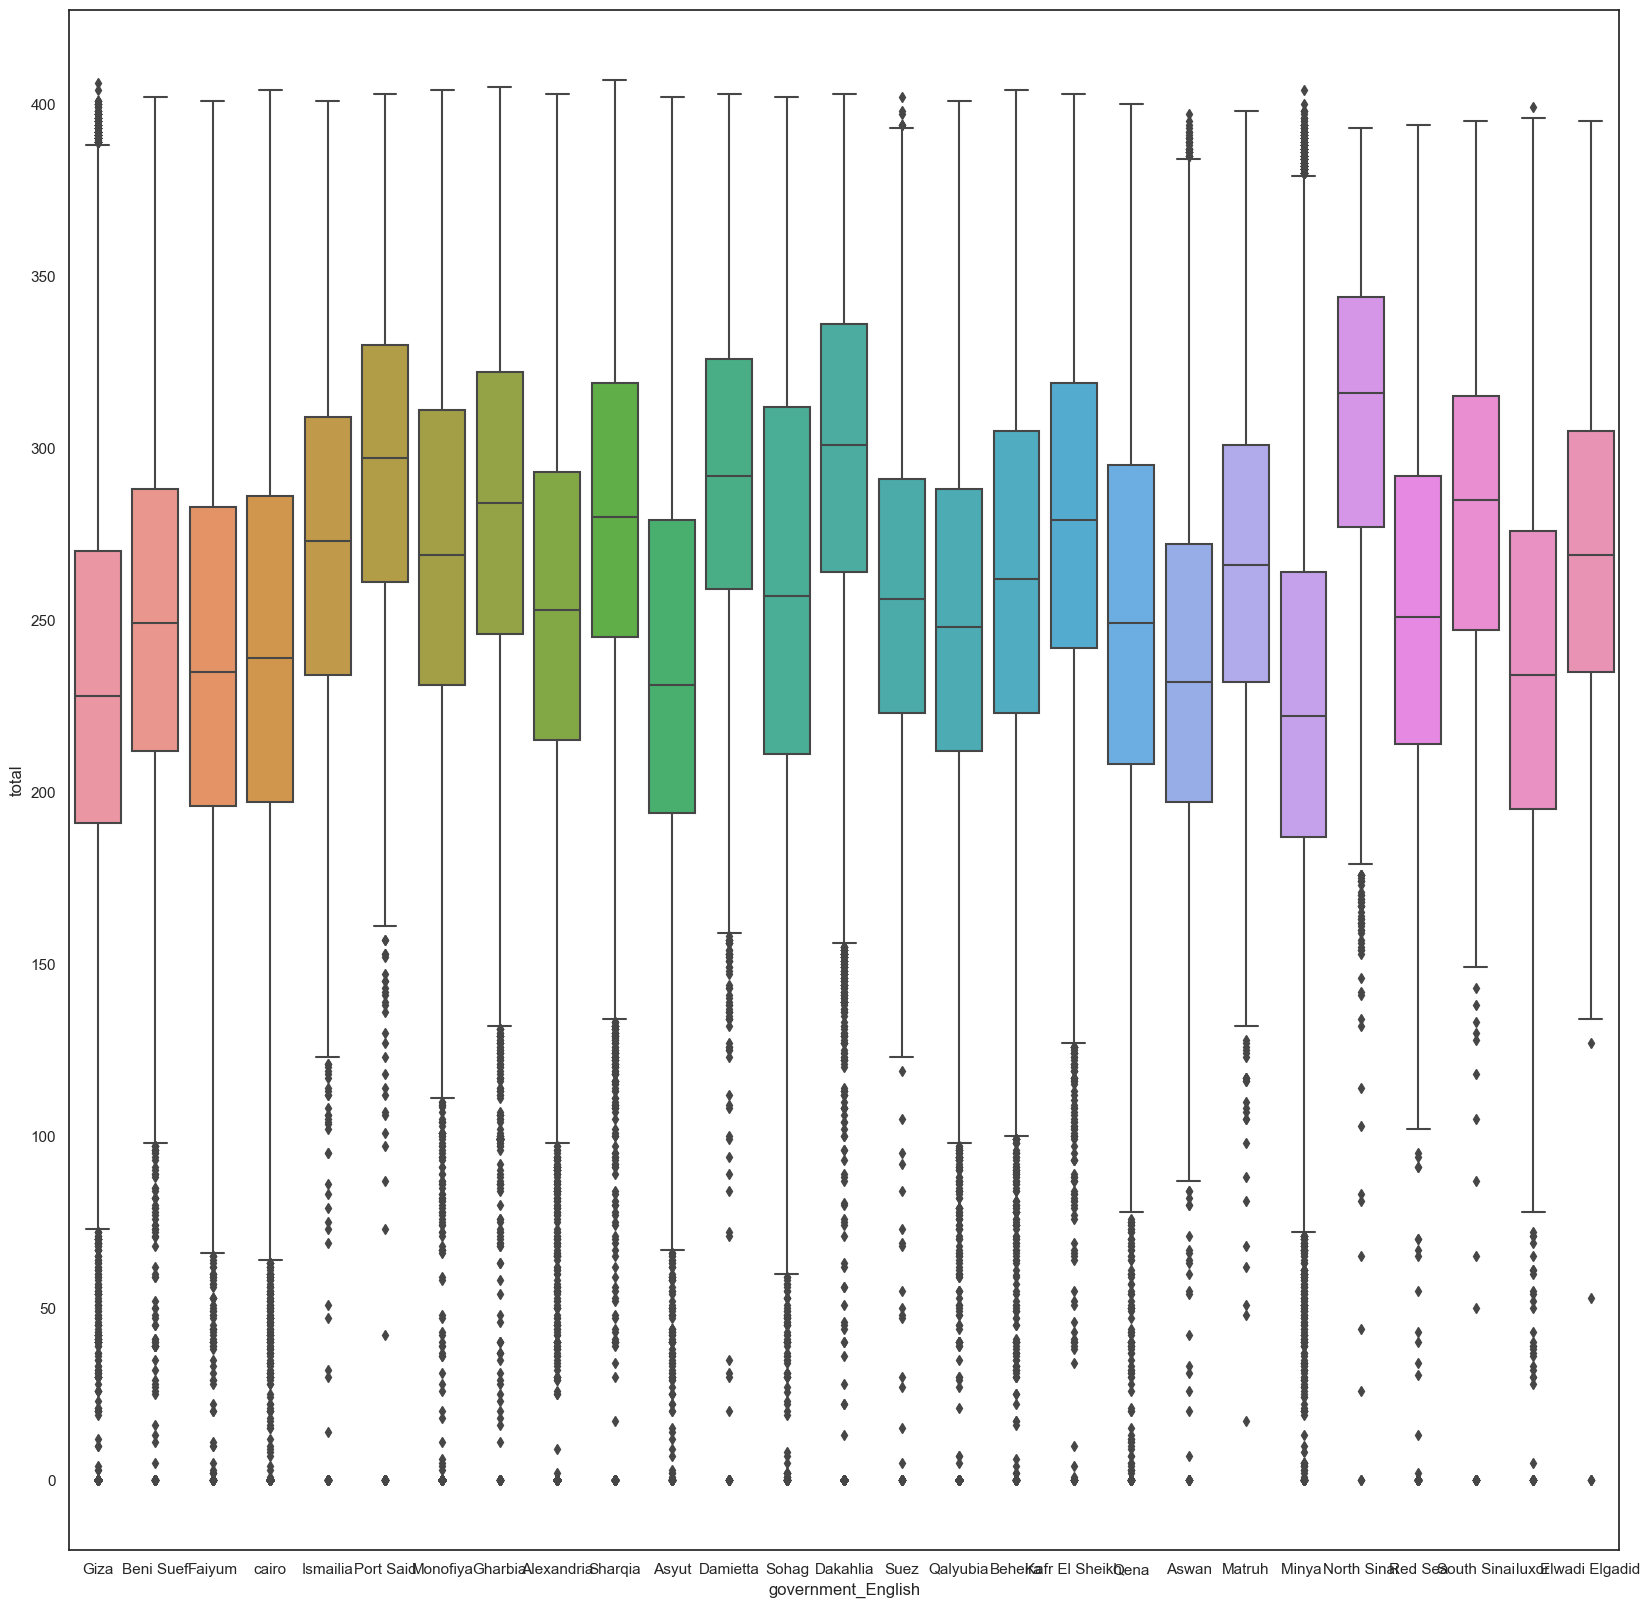

In [108]:
plt.figure(figsize=(20,20))
sns.boxplot(x=data1['government_English'],y=data1['total'])

<AxesSubplot:xlabel='government_English', ylabel='total'>

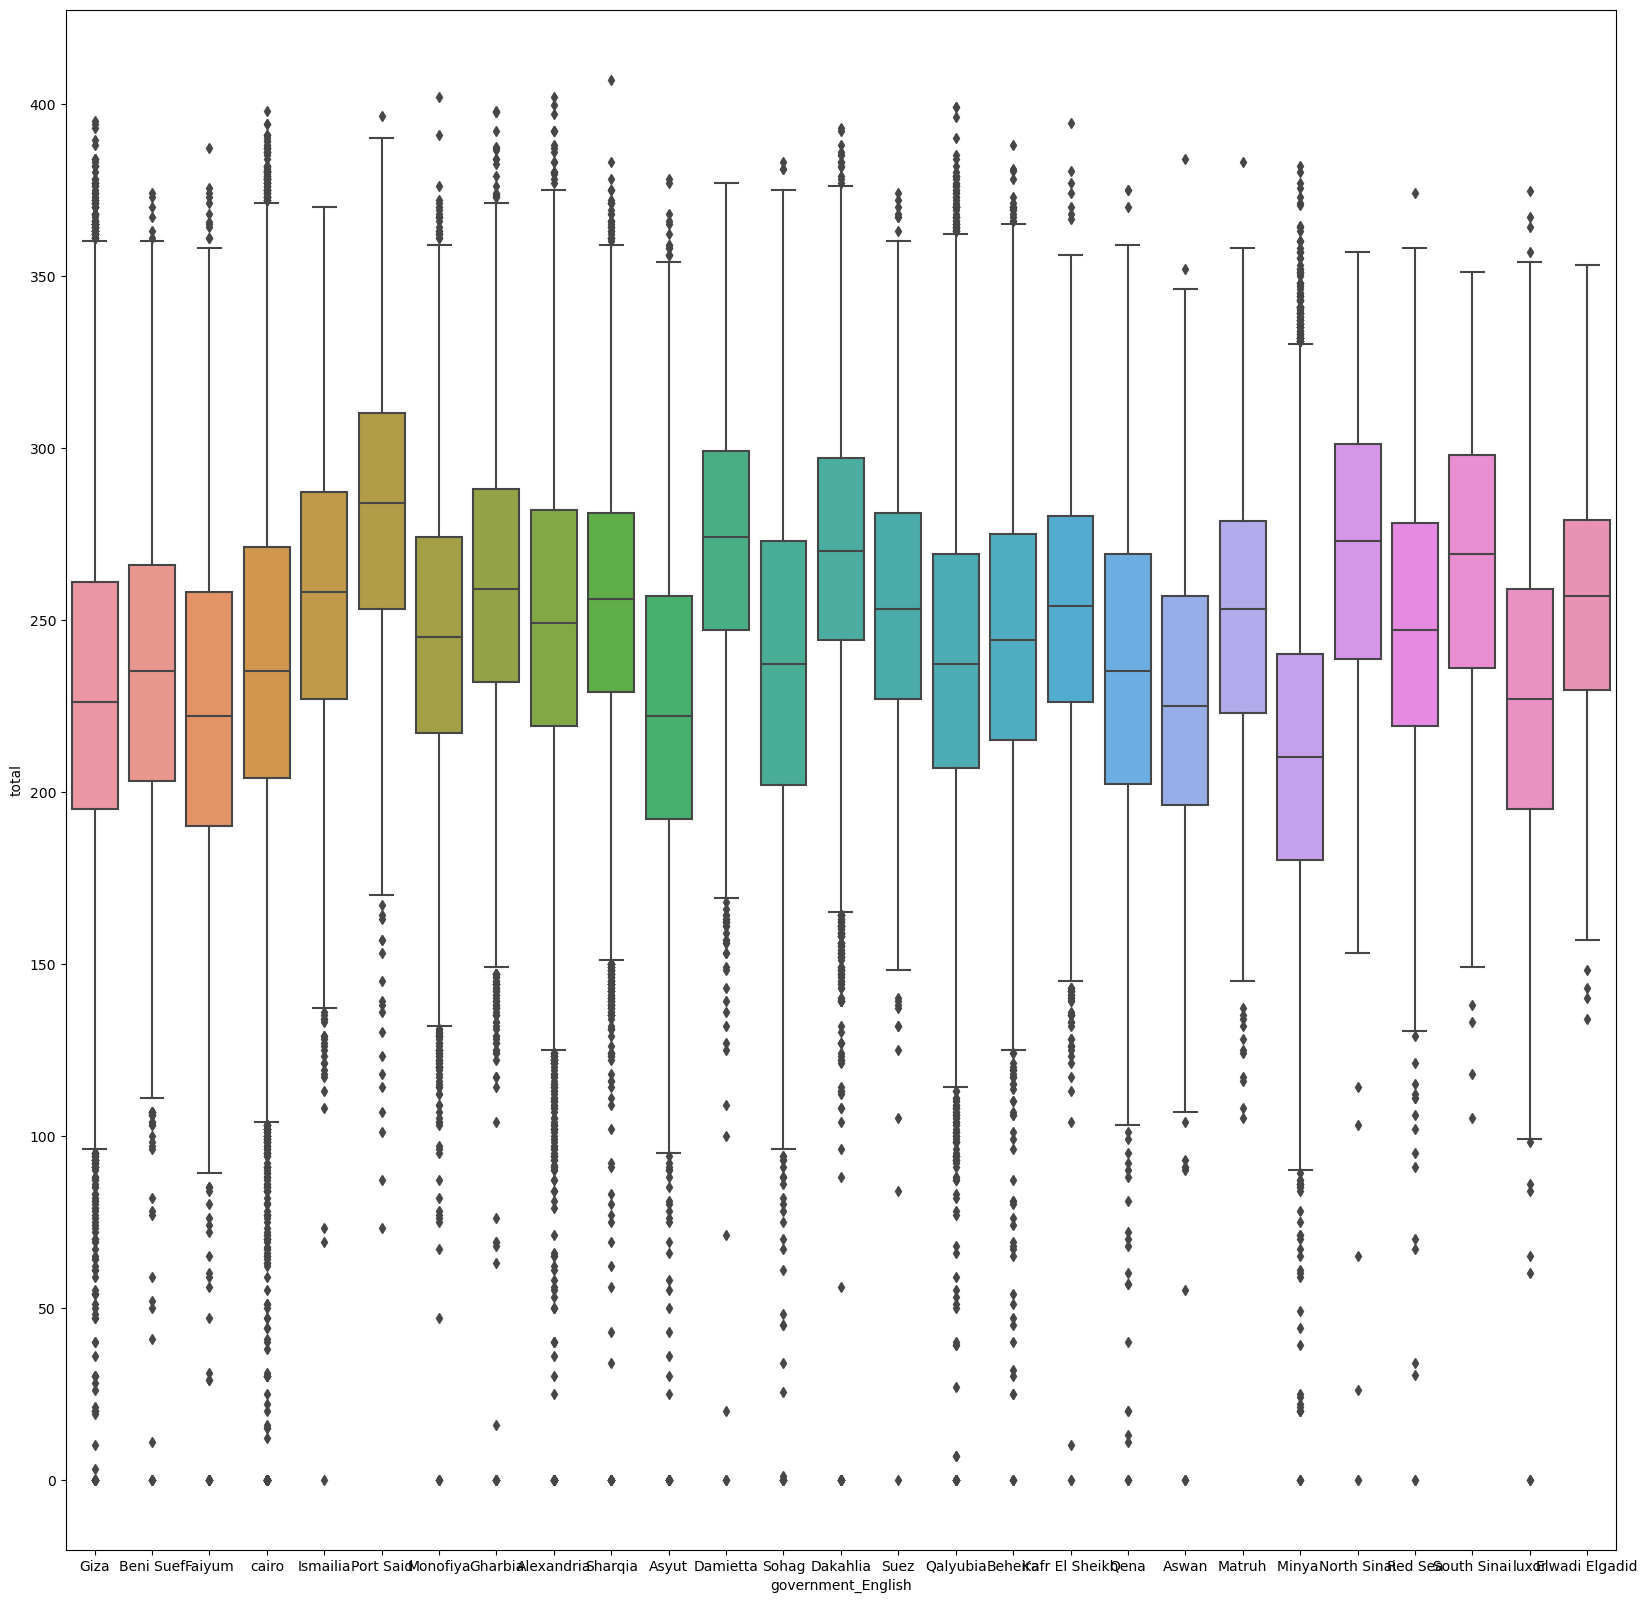

In [163]:
plt.figure(figsize=(20,20))
sns.boxplot(x=data_lit['government_English'],y=data1['total'])

In [113]:
top5.columns

Index(['desk_no', 'Percentage', 'arabic', 'first_foreign_lang',
       'second_foreign_lang', 'pure_mathematics', 'history', 'geography',
       'philosophy', 'psychology', 'chemistry', 'biology', 'geology',
       'applied_math', 'physics', 'total', 'religion', 'altarbiat_alwatania',
       'economics_statistics'],
      dtype='object')

Text(0.5, 1.0, 'Total Missing Values')

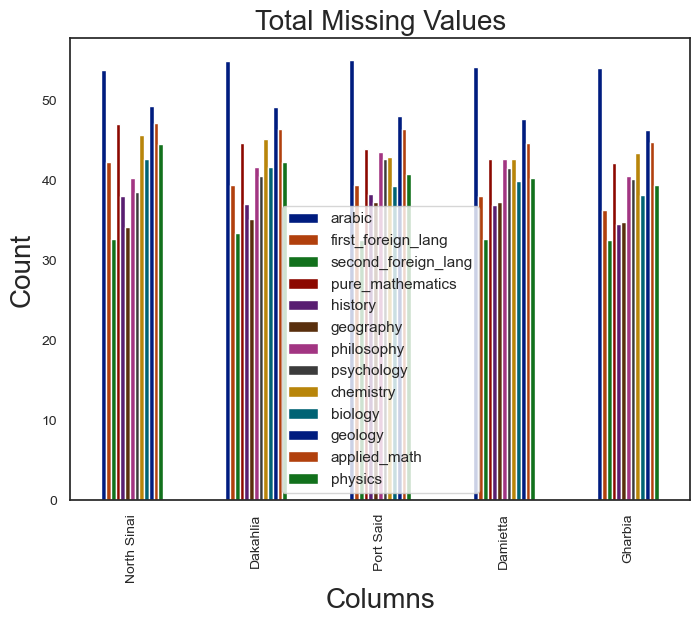

In [120]:
#total = data1.isnull().sum().sort_values(ascending=False)

total_select = top5.drop(columns=['desk_no', 'Percentage', 'total', 'religion', 'altarbiat_alwatania',
       'economics_statistics']).head(5)
total_select.plot(kind="bar", figsize = (8,6), fontsize = 10)

plt.xlabel("Columns", fontsize = 20)
plt.ylabel("Count", fontsize = 20)
plt.title("Total Missing Values", fontsize = 20)